In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [3]:
# Get case data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'/Gennembruds_DB/04_bekræftede_tilfælde_pr_vaccinationsstatus_pr_aldersgrp_pr_uge.csv',encoding='latin1',delimiter=';')
dfAdm = pd.read_csv(latestdir+'/Gennembruds_DB/06_nyindlagte_pr_vaccinationsstatus_pr_aldersgrp_pr_uge.csv',encoding='latin1',delimiter=';')


In [9]:
# df[(df.Aldersgruppe == '20-39') & (df.Vaccinationsstatus == '1. stik')]
df['Uge'] = df.Uge.str.replace('U','W')
dfAdm['Uge'] = dfAdm.Uge.str.replace('U','W')

# Plot of populationsizes  

In [10]:
import datetime 
df['Dato'] = [np.datetime64(datetime.datetime.strptime(d+'-1', "%G-W%V-%u")) for d in df.Uge]
dfAdm['Dato'] = [np.datetime64(datetime.datetime.strptime(d+'-1', "%G-W%V-%u")) for d in dfAdm.Uge]


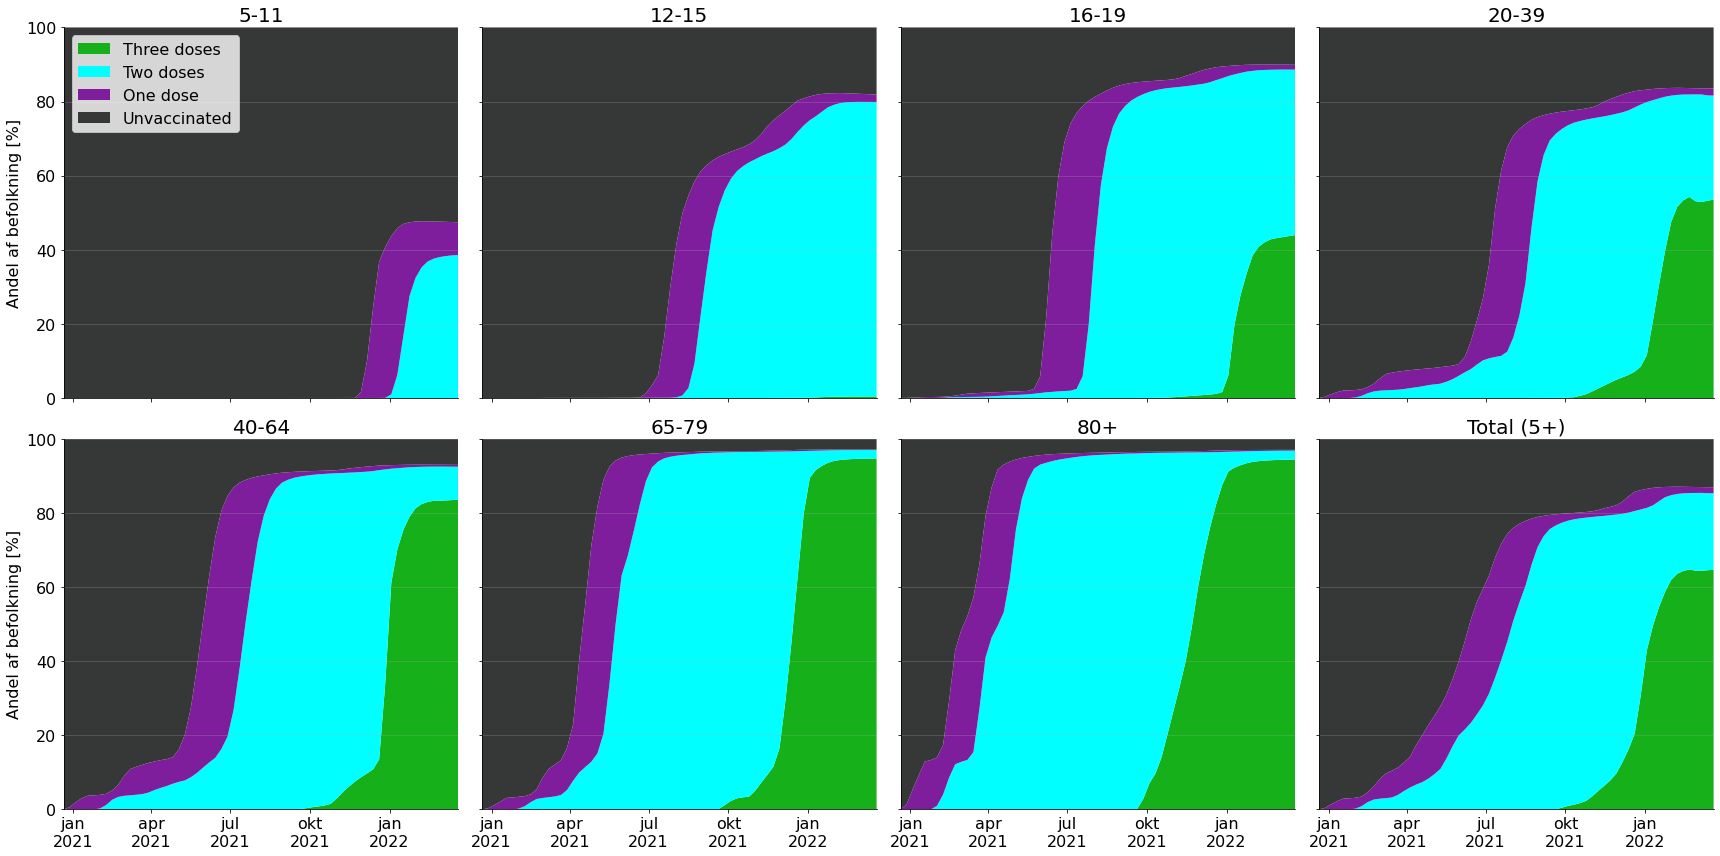

In [11]:
allAge = df.Aldersgruppe.unique()

fig,allAxes = plt.subplots(2,4,sharex=True,sharey=True,figsize=(24,12))

for i,curAge in enumerate(allAge):
    
    curdf = df[df.Aldersgruppe == curAge]
    # dfGr = curdf.groupby(['Vaccinationsstatus','Uge']).sum()
    dfGr = curdf.groupby(['Vaccinationsstatus','Dato']).sum()
    # dfGr.loc[:,'1. stik']
    # dfGr.unstack().transpose().loc['Befolksningstørrelse']
    # dfGr['Befolkningstørrelse']['1. stik']


    allDates = dfGr['Befolkningstørrelse']['1. stik'].index
    countNone = dfGr['Befolkningstørrelse']['Uvaccinerede'].values
    countOne = dfGr['Befolkningstørrelse']['1. stik'].values
    countTwo = dfGr['Befolkningstørrelse']['2. stik'].values
    countThree = dfGr['Befolkningstørrelse']['3. stik'].values

    popTot = countNone + countOne + countTwo + countThree 

    ax = allAxes.flatten()[i]
    ax.stackplot(allDates,
                100*countThree/popTot,
                100*countTwo/popTot,
                100*countOne/popTot,
                100*countNone/popTot,
                colors=['xkcd:green','xkcd:cyan','xkcd:purple','xkcd:dark grey'],
                labels=['Three doses','Two doses','One dose','Unvaccinated']
            )

    ax.set_ylim([0,100])
    ax.set_title(curAge)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 

    ax.grid(axis='y',alpha=0.3)

# Total

dfGr = df.groupby(['Vaccinationsstatus','Dato']).sum()

allDates = dfGr['Befolkningstørrelse']['1. stik'].index
countNone = dfGr['Befolkningstørrelse']['Uvaccinerede'].values
countOne = dfGr['Befolkningstørrelse']['1. stik'].values
countTwo = dfGr['Befolkningstørrelse']['2. stik'].values
countThree = dfGr['Befolkningstørrelse']['3. stik'].values

popTot = countNone + countOne + countTwo + countThree 

ax = allAxes.flatten()[i+1]
ax.stackplot(allDates,
            100*countThree/popTot,
            100*countTwo/popTot,
            100*countOne/popTot,
            100*countNone/popTot,
            colors=['xkcd:green','xkcd:cyan','xkcd:purple','xkcd:dark grey'],
            labels=['Three doses','Two doses','One dose','Unvaccinated']
        )

ax.set_ylim([0,100])
ax.set_title('Total (5+)')
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)



# General stuff
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(3,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax.legend(loc='upper left')

allAxes.flatten()[0].set_ylabel('Andel af befolkning [%]')
allAxes.flatten()[4].set_ylabel('Andel af befolkning [%]')
allAxes.flatten()[0].legend(loc='upper left')

fig.tight_layout()

fig.savefig(path_figs + 'AgeVaccineStatus')

# Cases

In [12]:
dfGr = df.groupby(['Vaccinationsstatus','Dato']).sum()

allDates = dfGr['Bekræftede tilfælde']['1. stik'].index
caseNone = dfGr['Bekræftede tilfælde']['Uvaccinerede'].values
caseOne = dfGr['Bekræftede tilfælde']['1. stik'].values
caseTwo = dfGr['Bekræftede tilfælde']['2. stik'].values
caseThree = dfGr['Bekræftede tilfælde']['3. stik'].values

caseTot = caseNone+caseOne+caseTwo+caseThree



(0.0, 100.0)

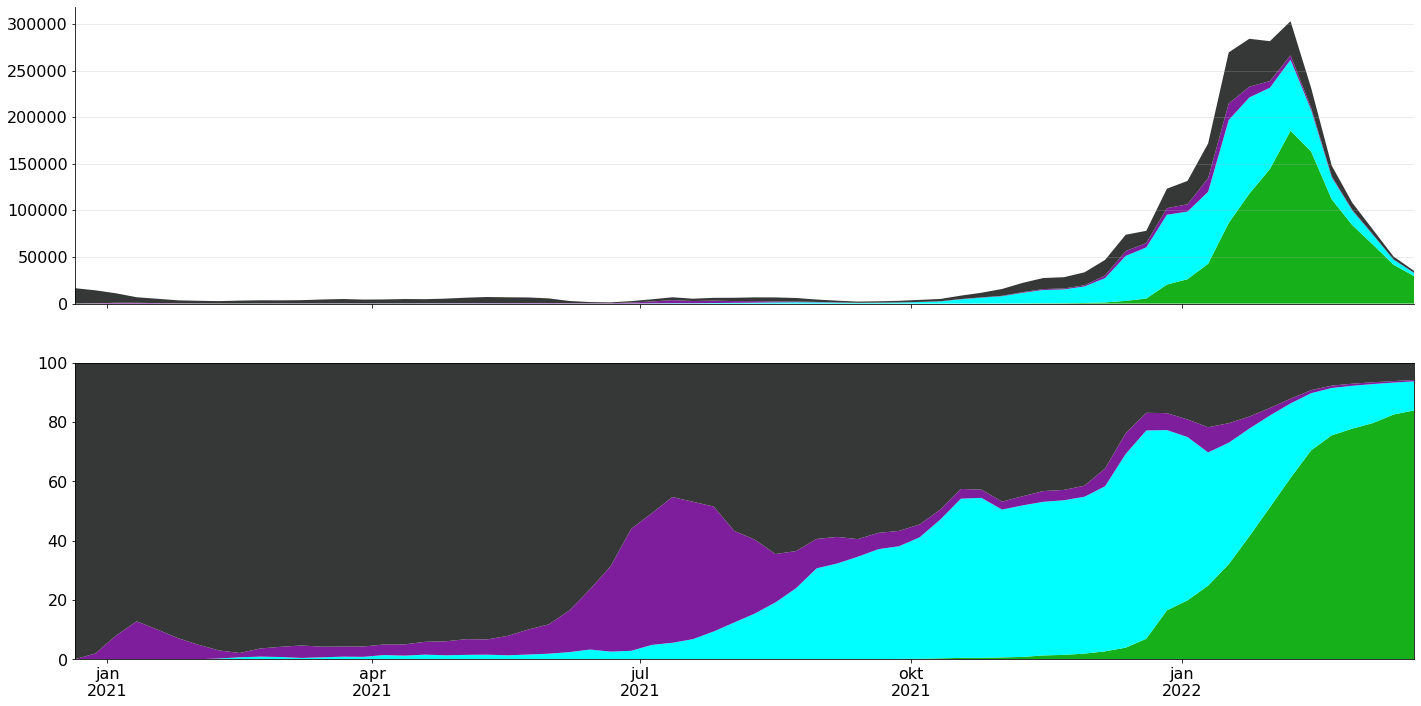

In [13]:

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(24,12))

ax1.stackplot(allDates,
        caseThree,
        caseTwo,
        caseOne,
        caseNone,
        colors=['xkcd:green','xkcd:cyan','xkcd:purple','xkcd:dark grey'],
        labels=['Three doses','Two doses','One dose','Unvaccinated']
        )


ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False) 
ax1.grid(axis='y',alpha=0.3)


ax2.stackplot(allDates,
        100*caseThree/caseTot,
        100*caseTwo/caseTot,
        100*caseOne/caseTot,
        100*caseNone/caseTot,
        colors=['xkcd:green','xkcd:cyan','xkcd:purple','xkcd:dark grey'],
        labels=['Three doses','Two doses','One dose','Unvaccinated']
        )

# ax2.plot(allDates,100*(countThree+countTwo)/popTot)
# ax.stackplot(allDates,
#             100*countThree/popTot,
#             100*countTwo/popTot,
#             100*countOne/popTot,
#             100*countNone/popTot,
#             colors=['xkcd:green','xkcd:cyan','xkcd:purple','xkcd:dark grey'],
#             labels=['Three doses','Two doses','One dose','Unvaccinated']
#         )


# ax1.set_ylim(top=10000)


# General stuff
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(3,'M'))
ax1.set_xticks(curXticks)
ax1.set_xlim(left=allDates[0],right=allDates[-1])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax2.set_ylim([0,100])

In [14]:
# fig,ax = plt.subplots()

# curCount = 100*countNone/popTot
# curCase = 100*caseNone/caseTot
# ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
# ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')


# ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink')
# ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,label='Underrepræsentation i smittetilfælde',color='xkcd:light green')
# # ax.fill_between(allDates,100*countNone/popTot)
# ax.legend()

# ax.spines['top'].set_visible(False) 
# ax.spines['right'].set_visible(False) 
# ax.grid(axis='y',alpha=0.3)

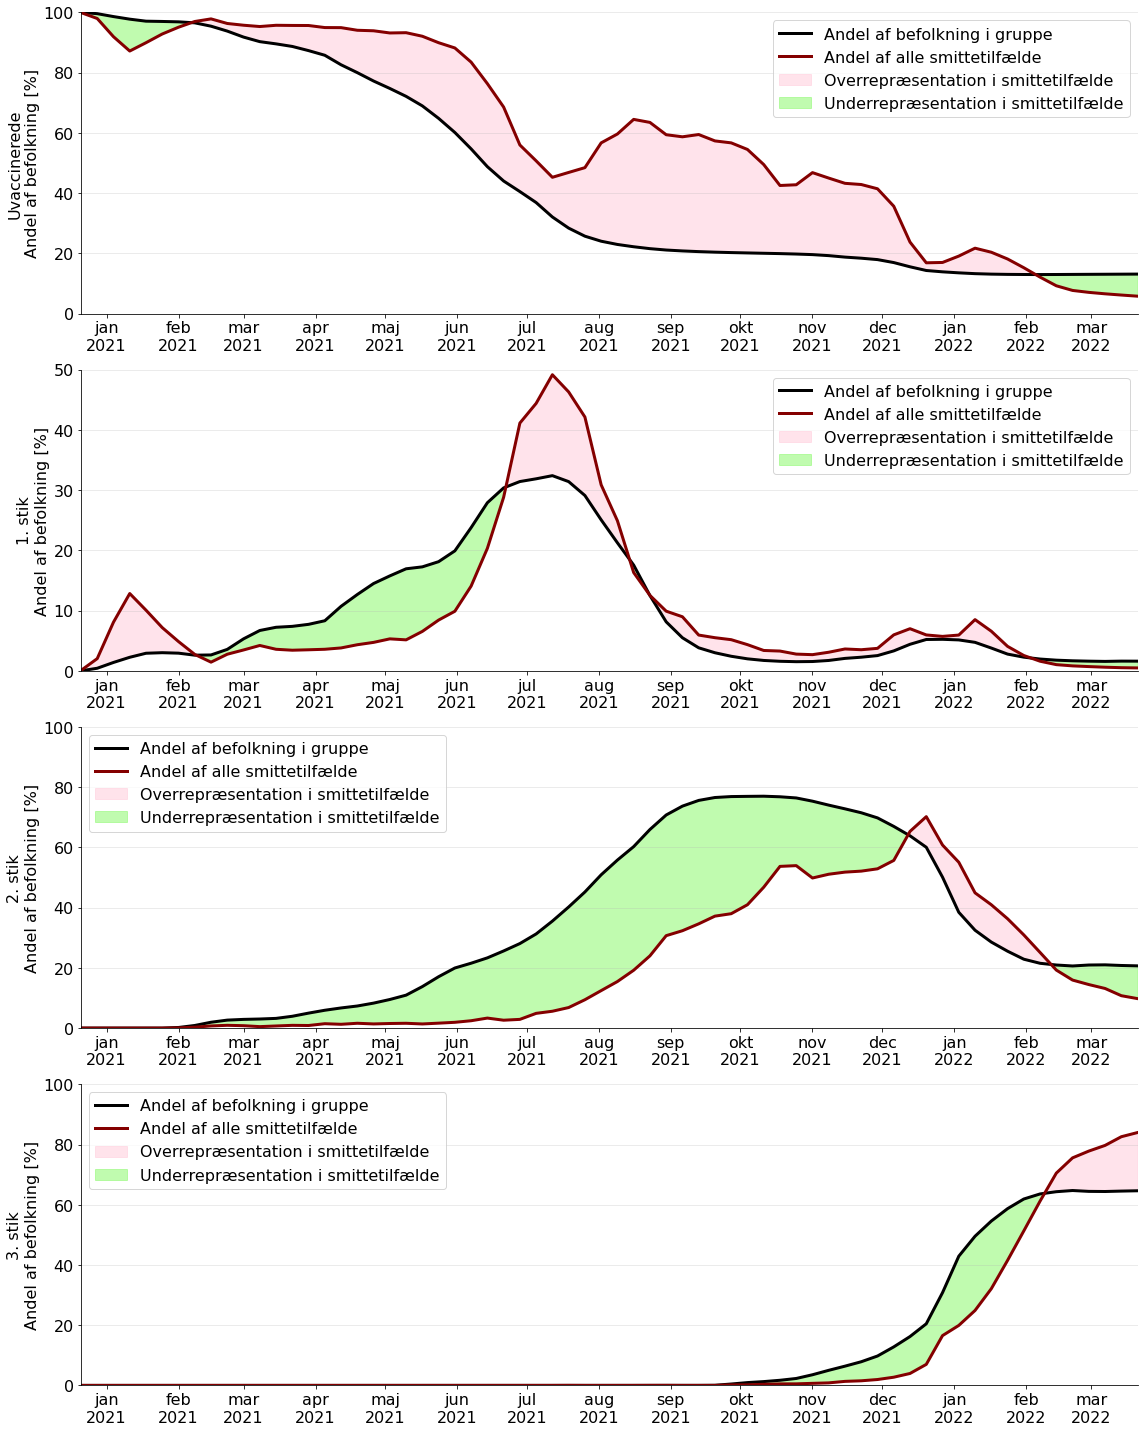

In [15]:
fig,allAxes = plt.subplots(4,1,figsize=(16,20))

ax = allAxes.flatten()[0]
curCount = 100*countNone/popTot
curCase = 100*caseNone/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel('Uvaccinerede\nAndel af befolkning [%]')
ax.set_ylim([0,100])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

#####

ax = allAxes.flatten()[1]
curCount = 100*countOne/popTot
curCase = 100*caseOne/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel('1. stik\nAndel af befolkning [%]')
ax.set_ylim([0,50])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

#####

ax = allAxes.flatten()[2]
curCount = 100*countTwo/popTot
curCase = 100*caseTwo/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel('2. stik\nAndel af befolkning [%]')
ax.set_ylim([0,100])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)

curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

#####

ax = allAxes.flatten()[3]
curCount = 100*countThree/popTot
curCase = 100*caseThree/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
# ax.set_ylabel('Andel af befolkning [%]')
ax.set_ylabel('3. stik\nAndel af befolkning [%]')
ax.set_ylim([0,100])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)


# General stuff
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))


fig.tight_layout()

fig.savefig(path_figs + 'Breakthrough/RelativePopulationShare')

# Admissions

In [17]:
dfGr = dfAdm.groupby(['Vaccinationsstatus','Dato']).sum()

allDates = dfGr['Antal nyindlagte']['1. stik'].index
AdmNone = dfGr['Antal nyindlagte']['Uvaccinerede'].values
AdmOne = dfGr['Antal nyindlagte']['1. stik'].values
AdmTwo = dfGr['Antal nyindlagte']['2. stik'].values
AdmThree = dfGr['Antal nyindlagte']['3. stik'].values

AdmTot = AdmNone+AdmOne+AdmTwo+AdmThree



(0.0, 100.0)

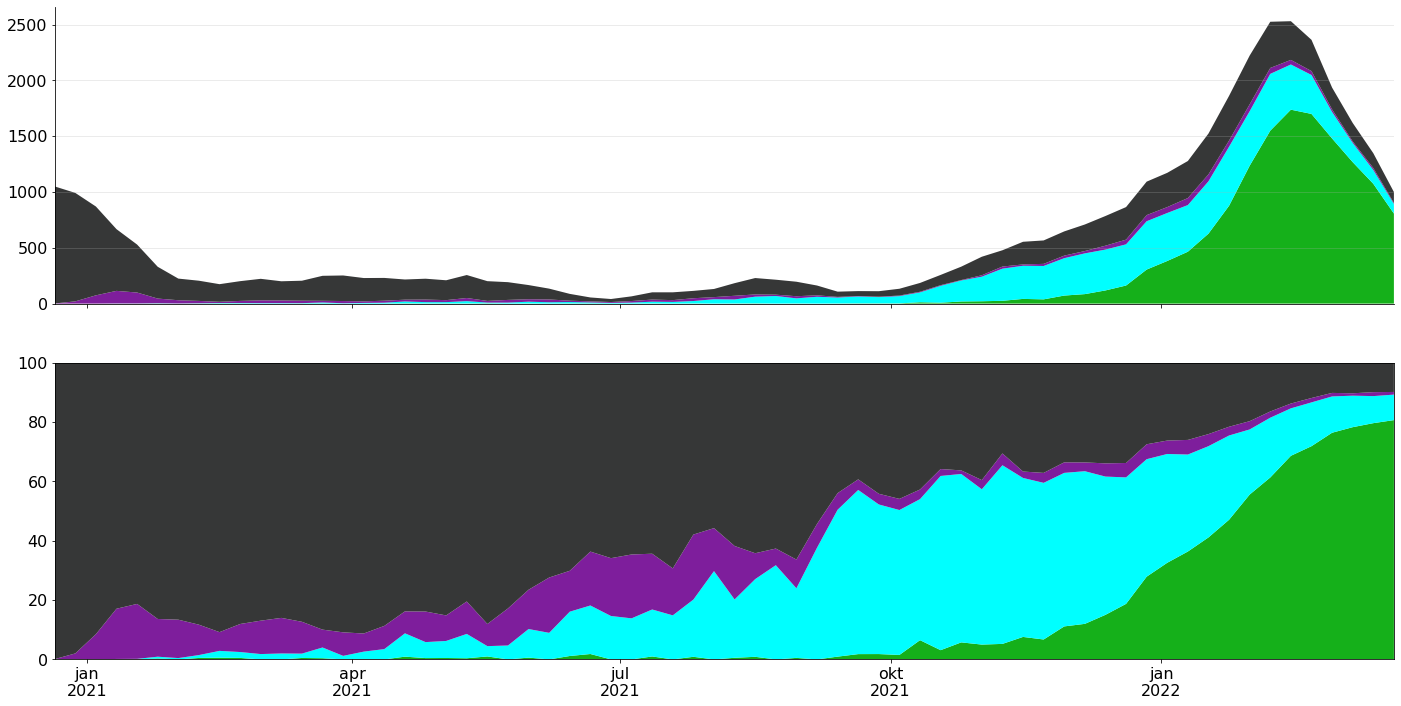

In [18]:

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(24,12))

ax1.stackplot(allDates,
        AdmThree,
        AdmTwo,
        AdmOne,
        AdmNone,
        colors=['xkcd:green','xkcd:cyan','xkcd:purple','xkcd:dark grey'],
        labels=['Three doses','Two doses','One dose','Unvaccinated']
        )


ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False) 
ax1.grid(axis='y',alpha=0.3)


ax2.stackplot(allDates,
        100*AdmThree/AdmTot,
        100*AdmTwo/AdmTot,
        100*AdmOne/AdmTot,
        100*AdmNone/AdmTot,
        colors=['xkcd:green','xkcd:cyan','xkcd:purple','xkcd:dark grey'],
        labels=['Three doses','Two doses','One dose','Unvaccinated']
        )


# General stuff
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(3,'M'))
ax1.set_xticks(curXticks)
ax1.set_xlim(left=allDates[0],right=allDates[-1])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax2.set_ylim([0,100])

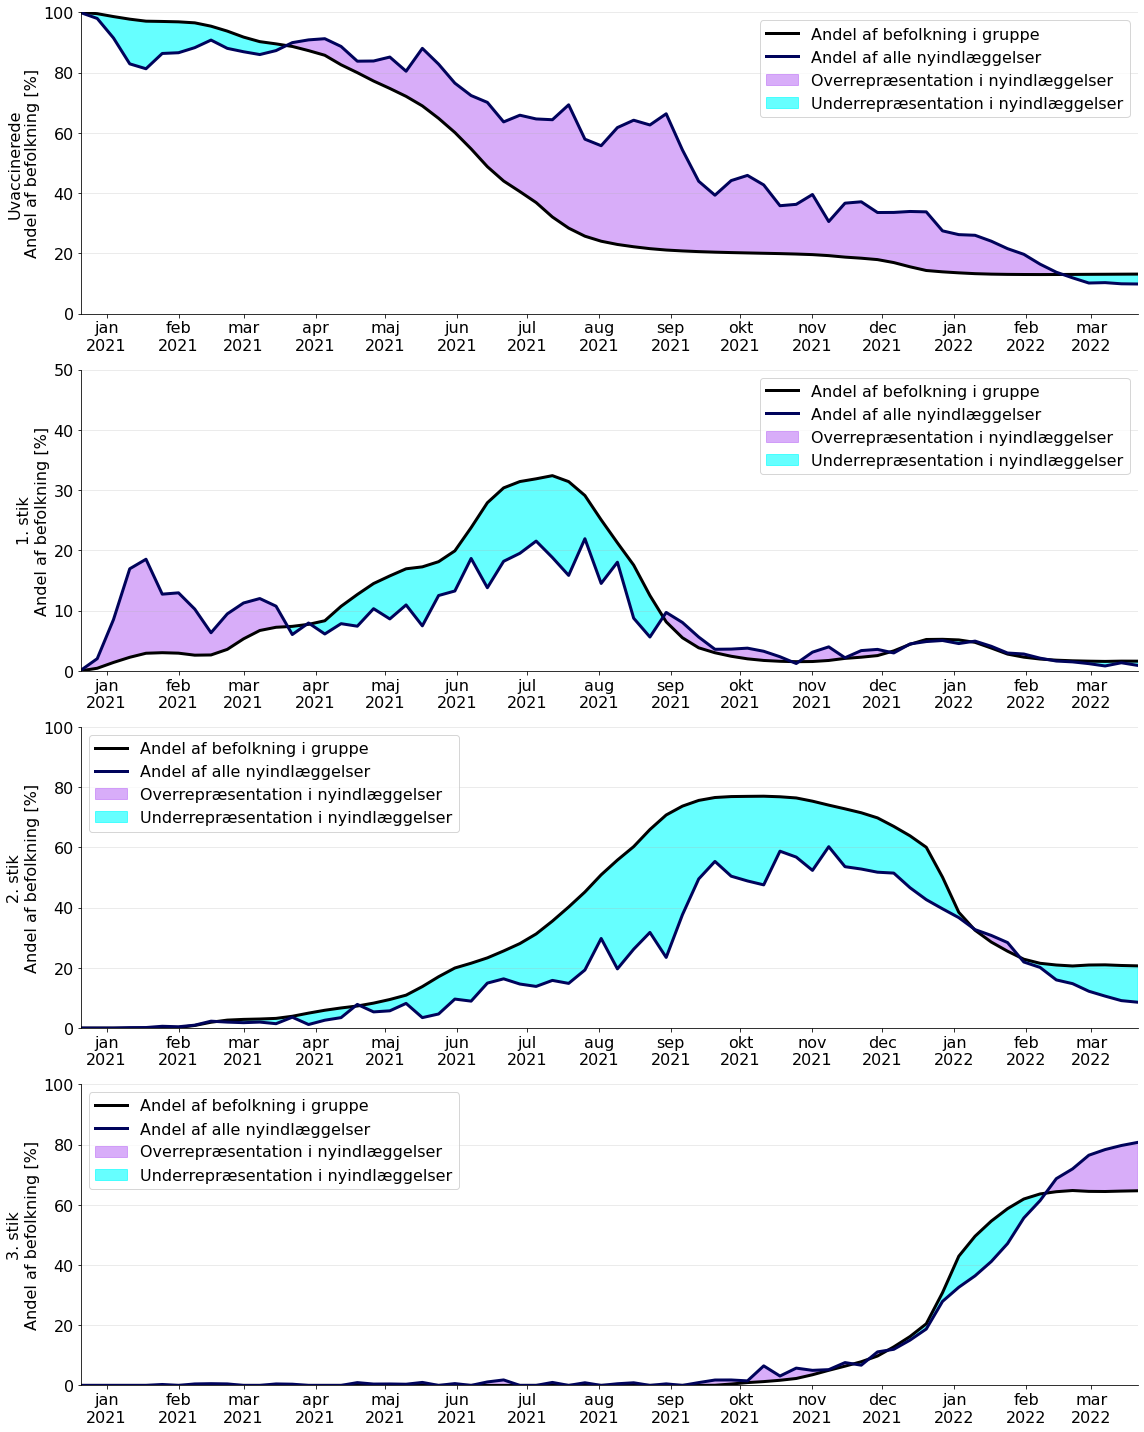

In [19]:
fig,allAxes = plt.subplots(4,1,figsize=(16,20))

ax = allAxes.flatten()[0]
curCount = 100*countNone/popTot
curAdm = 100*AdmNone/AdmTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curAdm,'xkcd:dark blue',label='Andel af alle nyindlæggelser')
ax.fill_between(allDates,curCount,curAdm,where=curCount < curAdm,interpolate=True,label='Overrepræsentation i nyindlæggelser',color='xkcd:light purple',alpha=0.6)
ax.fill_between(allDates,curCount,curAdm,where=curCount > curAdm,interpolate=True,label='Underrepræsentation i nyindlæggelser',color='xkcd:cyan',alpha=0.6)
ax.legend()
ax.set_ylabel('Uvaccinerede\nAndel af befolkning [%]')
ax.set_ylim([0,100])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

#####

ax = allAxes.flatten()[1]
curCount = 100*countOne/popTot
curAdm = 100*AdmOne/AdmTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curAdm,'xkcd:dark blue',label='Andel af alle nyindlæggelser')
ax.fill_between(allDates,curCount,curAdm,where=curCount < curAdm,interpolate=True,label='Overrepræsentation i nyindlæggelser',color='xkcd:light purple',alpha=0.6)
ax.fill_between(allDates,curCount,curAdm,where=curCount > curAdm,interpolate=True,label='Underrepræsentation i nyindlæggelser',color='xkcd:cyan',alpha=0.6)
ax.legend()
ax.set_ylabel('1. stik\nAndel af befolkning [%]')
ax.set_ylim([0,50])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

#####

ax = allAxes.flatten()[2]
curCount = 100*countTwo/popTot
curAdm = 100*AdmTwo/AdmTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curAdm,'xkcd:dark blue',label='Andel af alle nyindlæggelser')
ax.fill_between(allDates,curCount,curAdm,where=curCount < curAdm,interpolate=True,label='Overrepræsentation i nyindlæggelser',color='xkcd:light purple',alpha=0.6)
ax.fill_between(allDates,curCount,curAdm,where=curCount > curAdm,interpolate=True,label='Underrepræsentation i nyindlæggelser',color='xkcd:cyan',alpha=0.6)
ax.legend()
ax.set_ylabel('2. stik\nAndel af befolkning [%]')
ax.set_ylim([0,100])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)

curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

#####

ax = allAxes.flatten()[3]
curCount = 100*countThree/popTot
curAdm = 100*AdmThree/AdmTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curAdm,'xkcd:dark blue',label='Andel af alle nyindlæggelser')
ax.fill_between(allDates,curCount,curAdm,where=curCount < curAdm,interpolate=True,label='Overrepræsentation i nyindlæggelser',color='xkcd:light purple',alpha=0.6)
ax.fill_between(allDates,curCount,curAdm,where=curCount > curAdm,interpolate=True,label='Underrepræsentation i nyindlæggelser',color='xkcd:cyan',alpha=0.6)
ax.legend()
# ax.set_ylabel('Andel af befolkning [%]')
ax.set_ylabel('3. stik\nAndel af befolkning [%]')
ax.set_ylim([0,100])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)


# General stuff
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))


fig.tight_layout()

fig.savefig(path_figs + 'Breakthrough/RelativePopulationShare_Admissions')

# Age over-/under-representation

In [20]:
dfGr = df.groupby(['Aldersgruppe','Dato']).sum()
allAge = df.Aldersgruppe.unique()

allDates = dfGr['Bekræftede tilfælde']['5-11'].index
caseAge0 = dfGr['Bekræftede tilfælde'][allAge[0]].values
caseAge1 = dfGr['Bekræftede tilfælde'][allAge[1]].values
caseAge2 = dfGr['Bekræftede tilfælde'][allAge[2]].values
caseAge3 = dfGr['Bekræftede tilfælde'][allAge[3]].values
caseAge4 = dfGr['Bekræftede tilfælde'][allAge[4]].values
caseAge5 = dfGr['Bekræftede tilfælde'][allAge[5]].values
caseAge6 = dfGr['Bekræftede tilfælde'][allAge[6]].values

# caseTot = caseNone+caseOne+caseTwo+caseThree
caseTot = df.groupby(['Dato']).sum()['Bekræftede tilfælde'].values

In [21]:
dfGrAdm = dfAdm.groupby(['Aldersgruppe','Dato']).sum()
allAge = dfAdm.Aldersgruppe.unique()

allDatesAdm = dfGrAdm['Antal nyindlagte']['5-11'].index
AdmAge0 = dfGrAdm['Antal nyindlagte'][allAge[0]].values
AdmAge1 = dfGrAdm['Antal nyindlagte'][allAge[1]].values
AdmAge2 = dfGrAdm['Antal nyindlagte'][allAge[2]].values
AdmAge3 = dfGrAdm['Antal nyindlagte'][allAge[3]].values
AdmAge4 = dfGrAdm['Antal nyindlagte'][allAge[4]].values
AdmAge5 = dfGrAdm['Antal nyindlagte'][allAge[5]].values
AdmAge6 = dfGrAdm['Antal nyindlagte'][allAge[6]].values

AdmTot = dfAdm.groupby(['Dato']).sum()['Antal nyindlagte'].values

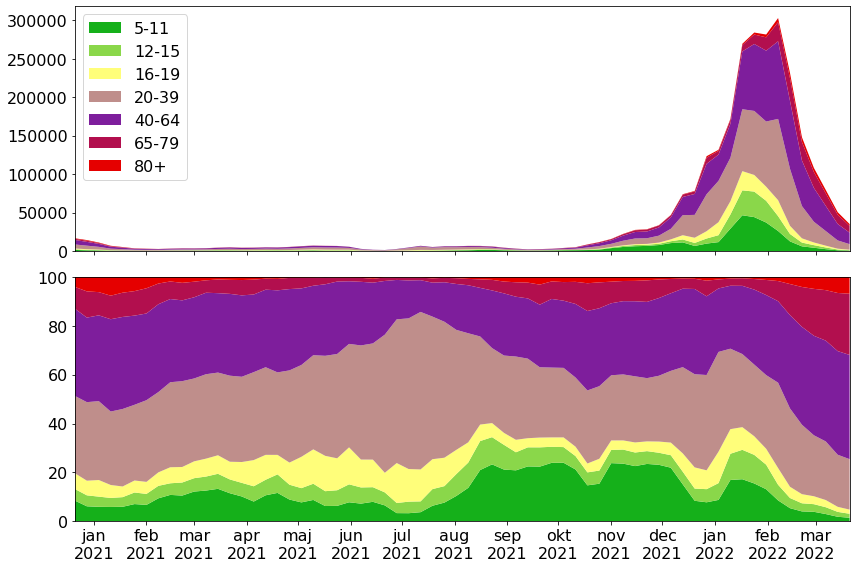

In [22]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

curcmap = pf.getColormapFromList(['xkcd:green','xkcd:light yellow','xkcd:purple','xkcd:red'],7)

ax1.stackplot(allDates,
        caseAge0,
        caseAge1,
        caseAge2,
        caseAge3,
        caseAge4,
        caseAge5,
        caseAge6,
        labels=allAge,
        colors = [curcmap(x) for x in range(0,7)]
    )
    
ax2.stackplot(allDates,
        100*caseAge0/caseTot,
        100*caseAge1/caseTot,
        100*caseAge2/caseTot,
        100*caseAge3/caseTot,
        100*caseAge4/caseTot,
        100*caseAge5/caseTot,
        100*caseAge6/caseTot,
        labels=allAge,
        colors = [curcmap(x) for x in range(0,7)]
    )

ax1.legend(loc='upper left')
ax2.set_ylim([0,100])

curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax1.set_xticks(curXticks)
ax1.set_xlim(left=allDates[0],right=allDates[-1])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

fig.tight_layout()

In [23]:
popAge0 = df[df.Aldersgruppe == allAge[0]].groupby('Dato').sum()['Befolkningstørrelse'].values
popAge1 = df[df.Aldersgruppe == allAge[1]].groupby('Dato').sum()['Befolkningstørrelse'].values
popAge2 = df[df.Aldersgruppe == allAge[2]].groupby('Dato').sum()['Befolkningstørrelse'].values
popAge3 = df[df.Aldersgruppe == allAge[3]].groupby('Dato').sum()['Befolkningstørrelse'].values
popAge4 = df[df.Aldersgruppe == allAge[4]].groupby('Dato').sum()['Befolkningstørrelse'].values
popAge5 = df[df.Aldersgruppe == allAge[5]].groupby('Dato').sum()['Befolkningstørrelse'].values
popAge6 = df[df.Aldersgruppe == allAge[6]].groupby('Dato').sum()['Befolkningstørrelse'].values

popTot = df.groupby('Dato').sum()['Befolkningstørrelse'].values

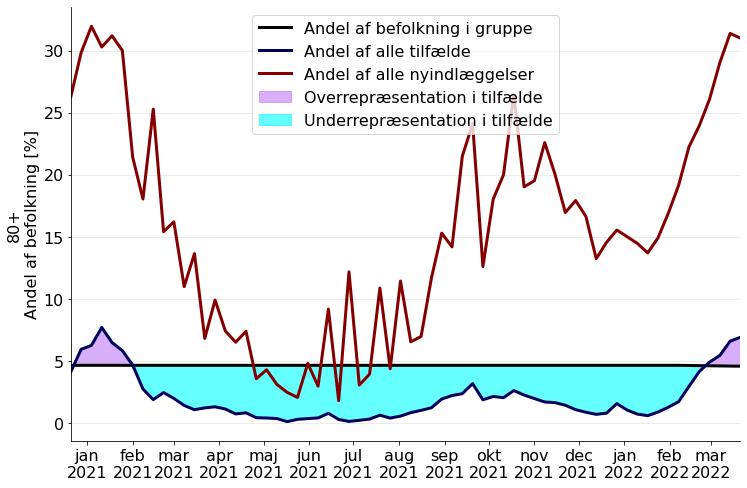

In [24]:
fig,ax = plt.subplots()

# ax = allAxes.flatten()[3]
curAge = allAge[6]
curCount = 100*popAge6/popTot
curCase = 100*caseAge6/caseTot
curAdm = 100*AdmAge6/AdmTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark blue',label='Andel af alle tilfælde')
ax.plot(allDates,curAdm,'xkcd:dark red',label='Andel af alle nyindlæggelser')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i tilfælde',color='xkcd:light purple',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i tilfælde',color='xkcd:cyan',alpha=0.6)
ax.legend()
ax.set_ylabel(f'{curAge}\nAndel af befolkning [%]')
# ax.set_ylim([0,100])
# ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)


# General stuff
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
ax.set_xticks(curXticks)
ax.set_xlim(left=allDates[0],right=allDates[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))


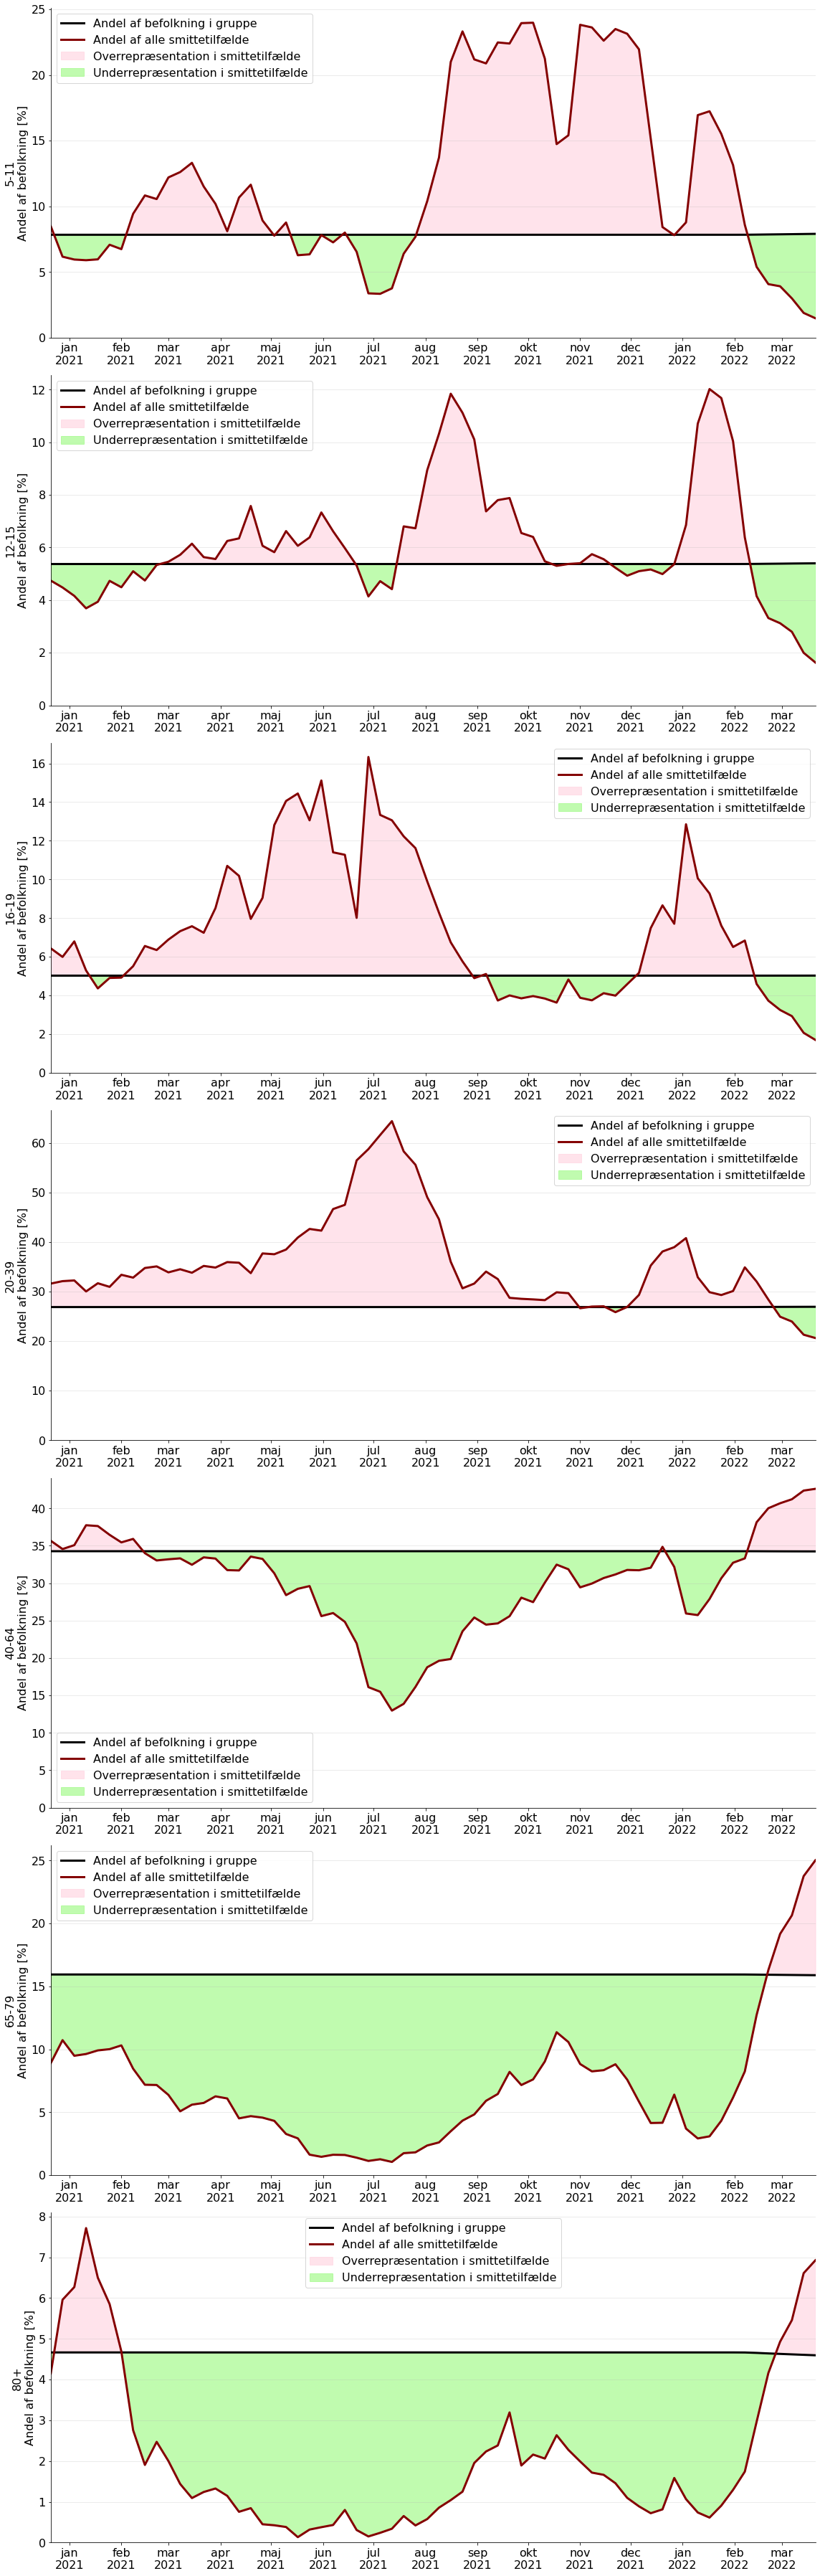

In [25]:
# fig,allAxes = plt.subplots(7,1)
fig,allAxes = plt.subplots(7,1,figsize=(16,50))


ax = allAxes.flatten()[0]
curAge = allAge[0]
curCount = 100*popAge0/popTot
curCase = 100*caseAge0/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel(f'{curAge}\nAndel af befolkning [%]')
ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)


ax = allAxes.flatten()[1]
curAge = allAge[1]
curCount = 100*popAge1/popTot
curCase = 100*caseAge1/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel(f'{curAge}\nAndel af befolkning [%]')
ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)


ax = allAxes.flatten()[2]
curAge = allAge[2]
curCount = 100*popAge2/popTot
curCase = 100*caseAge2/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel(f'{curAge}\nAndel af befolkning [%]')
ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)


ax = allAxes.flatten()[3]
curAge = allAge[3]
curCount = 100*popAge3/popTot
curCase = 100*caseAge3/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel(f'{curAge}\nAndel af befolkning [%]')
ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)

ax = allAxes.flatten()[4]
curAge = allAge[4]
curCount = 100*popAge4/popTot
curCase = 100*caseAge4/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel(f'{curAge}\nAndel af befolkning [%]')
ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)

ax = allAxes.flatten()[5]
curAge = allAge[5]
curCount = 100*popAge5/popTot
curCase = 100*caseAge5/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel(f'{curAge}\nAndel af befolkning [%]')
ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)


ax = allAxes.flatten()[6]
curAge = allAge[6]
curCount = 100*popAge6/popTot
curCase = 100*caseAge6/caseTot
ax.plot(allDates,curCount,'k',label='Andel af befolkning i gruppe')
ax.plot(allDates,curCase,'xkcd:dark red',label='Andel af alle smittetilfælde')
ax.fill_between(allDates,curCount,curCase,where=curCount < curCase,interpolate=True,label='Overrepræsentation i smittetilfælde',color='xkcd:light pink',alpha=0.6)
ax.fill_between(allDates,curCount,curCase,where=curCount > curCase,interpolate=True,label='Underrepræsentation i smittetilfælde',color='xkcd:light green',alpha=0.6)
ax.legend()
ax.set_ylabel(f'{curAge}\nAndel af befolkning [%]')
ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.grid(axis='y',alpha=0.3)



# General stuff
curXticks = np.arange(np.datetime64('2021-01'),np.datetime64('2022-06'),np.timedelta64(1,'M'))
for ax in allAxes:
    ax.set_xticks(curXticks)
    ax.set_xlim(left=allDates[0],right=allDates[-1])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

fig.tight_layout()

fig.savefig(path_figs+'Breakthrough/RelativePopulationShare_Age')

In [26]:
df

,Uge,Aldersgruppe,Vaccinationsstatus,Bekræftede tilfælde,sort_Var,Befolkningstørrelse,Bekræftede tilfælde pr. 100.000,Dato
0,2020-W52,5-11,Uvaccinerede,1404,0,436558,"321,61",2020-12-21
1,2020-W52,5-11,1. stik,0,1,0,"0,00",2020-12-21
2,2020-W52,5-11,2. stik,0,2,0,"0,00",2020-12-21
3,2020-W52,5-11,3. stik,0,3,0,"0,00",2020-12-21
4,2020-W52,12-15,Uvaccinerede,784,0,299024,"262,19",2020-12-21
5,2020-W52,12-15,1. stik,0,1,0,"0,00",2020-12-21
6,2020-W52,12-15,2. stik,0,2,0,"0,00",2020-12-21
7,2020-W52,12-15,3. stik,0,3,0,"0,00",2020-12-21
8,2020-W52,16-19,Uvaccinerede,1063,0,279602,"380,18",2020-12-21
9,2020-W52,16-19,1. stik,1,1,1,"100000,00",2020-12-21
